# Courbure Minimale

In [2]:
## import des librairies utilisées
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff


## 1 Courbes de Bézier

#### 1. On fixe $A_0 = (-1, 0)$ et $A_n = (1, 0)$. Représenter plusieurs courbes de Bézier avec $n = 2, 3, 4$ et différents choix de points de contrôle afin de comprendre leur rôle pour la forme de la courbe.


In [3]:
def fact(n):    # factorielle de n
    if n == 0:
        return 1
    else:
        return n * fact(n - 1)

def k_parmi_n(n, k):    # combinaison de k parmi n
    return fact(n) / (fact(k) * fact(n - k))

def x(t, A):    # coordonnée x(t) en fonction du point de contrôle A_i
    S = 0
    n = len(A) - 1
    for i in range(n + 1):
        S += k_parmi_n(n, i) * (t ** i) * ((1 - t) ** (n - i)) * A[i][0]
    return S

def z(t, A):    # coordonnée z(t) en fonction du point de contrôle A_i
    S = 0
    n = len(A) - 1
    for i in range(n + 1):
        S += k_parmi_n(n, i) * (t ** i) * ((1 - t) ** (n - i)) * A[i][1]
    return S

def X(Aliste):  # liste des valeurs de x(t) pour t allant de 0 à 1 avec un pas de 0.0001
    X = []
    for i in range(1001): 
        t = i / 1000
        X.append(x(t, Aliste))
    return X

def Z(Aliste):  # liste des valeurs de z(t) pour t allant de 0 à 1 avec un pas de 0.0001
    Z = []
    for i in range(1001):
        t = i / 1000
        Z.append(z(t, Aliste))
    return Z

def gamma(A):   # fonction gamma(x, z) pour une liste de points de contrôle A
    X_vals = X(A)
    Z_vals = Z(A)
    gamma = np.zeros((len(X_vals), 2))
    for i in range(len(X_vals)):
        gamma[i][0] = X_vals[i]
        gamma[i][1] = Z_vals[i]
    return gamma

-   $n = 2$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (0.5,0.3)$, $A_2 = (1,0)$

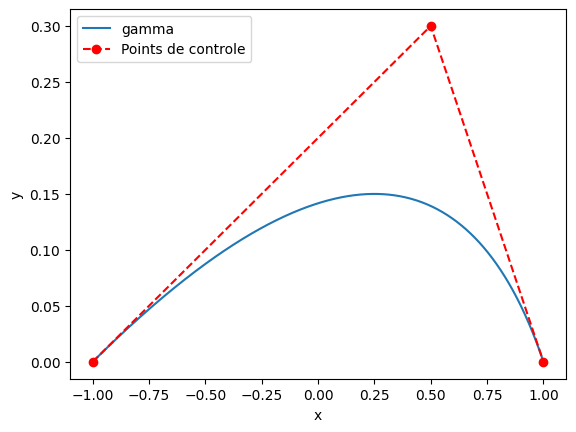

In [ ]:
A = [[-1,0],[0.5,0.3],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A) 
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


-   $n = 3$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (0,0.3)$, $A_2 = (0.6,-0.6)$, $A_3 = (1,0)$

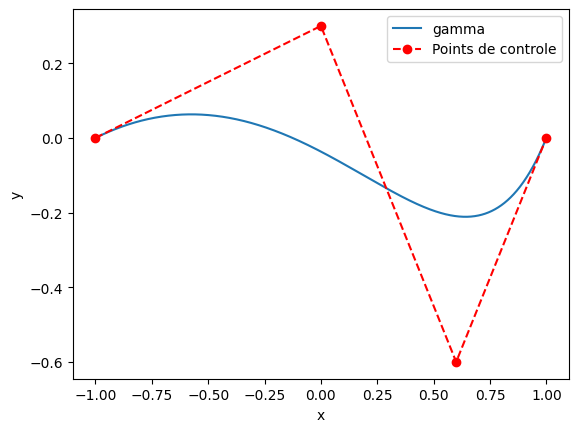

In [5]:
A = [[-1,0],[0,0.3],[0.6,-0.6],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

-   $n = 4$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (-0.2,0.1)$, $A_2 = (-0.15,0.7)$, $A_3 = (0.5,-0.9)$, $A_4 = (1,0)$

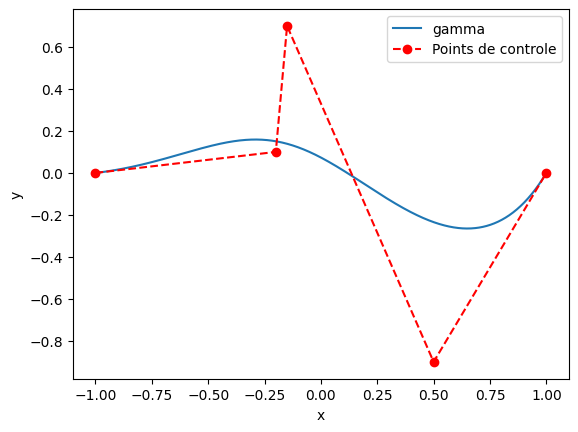

In [6]:
A = [[-1,0],[-0.2,0.1],[-0.15,0.7],[0.5,-0.9],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 2. Les pentes initiales et finales sont fixées : $p_0$ en $A_0$ et $p_n$ en $A_n$. Déterminer les conditions sur les points de contrôle permettant de satisfaire ces conditions.

Par une lecture graphique, il semblerait que la pente $p_0$ soit égale à celle de la droite reliant $A_0$ et $A_1$. 

Ainsi, le point de contrôle $A_1 = (x_1, y_1)$ doit satisfaire :

$$
p_0 = \frac{y_1 - y_0}{x_1 - x_0}
$$

De la même manière, pour la pente finale $p_n$, le point de contrôle $A_{n-1} = (x_{n-1}, y_{n-1})$ doit satisfaire :

$$
p_n = \frac{y_n - y_{n-1}}{x_n - x_{n-1}}
$$

Les points de contrôle $A_1$ et $A_{n-1}$ doivent donc se situer respectivement sur les droites suivantes :

- Pour $A_1$ : $y = -p_0(x_0 - x_{1}) + y_0$
- Pour $A_{n-1}$ : $y = -p_n(x_n - x_{n-1}) + y_n$

Ces conditions montrent que les pentes initiales et finales dépendent uniquement des points de contrôle $A_1$ et $A_{n-1}$. 


#### 3. Représenter des courbes de Bézier satisfaisant $p_0 = 1$ et $p_n = -1$. Idem avec $p_0 = 0$ et $p_n = -2$.

##### 1.    Soient $p_0 = 1$ et $p_n = -1$

On fixe $A_0 = (−1, 0)$ et $A_n = (1, 0)$. <br>
Ainsi d'après la question précédente on doit fixer le points de contrôles $A_1$ et $A_{n-1}$ de la maniere suivante :
$$A_1 = (x_1, 1+x_1) \quad et \quad A_{n-1} = (x_{n-1}, 1-x_{n-1})$$

On peut alors tracer les courbes de Bézier suivantes :

- Pour n = 2 seul le point de controle $A_1 = (0,1)$ satisfait $p_0 = 1$ et $p_n = -1$.
- A partir de n=3 une infinité de valeur de de $A_1$ et $A_{n-1}$ conviennent pour $p_0 = 1$ et $p_n = -1$.

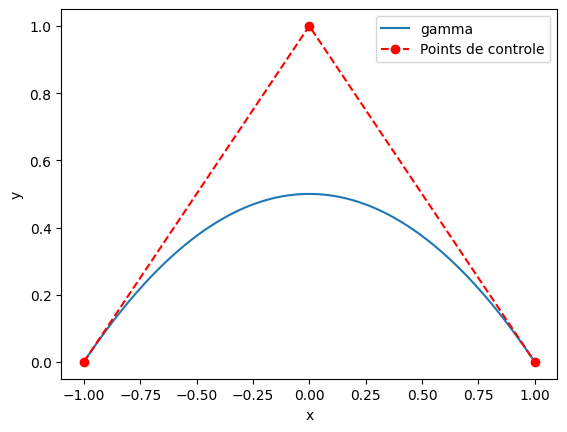

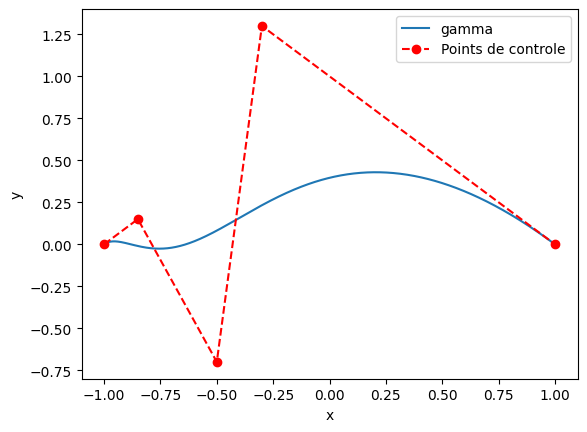

In [7]:
A = [[-1,0],[0,1],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
A = [[-1,0],[-0.85,0.15],[-0.5,-0.7],[-0.3, 1.3],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### 2.    Soient $p_0 = 0$ et $p_n = -2$

On fixe $A_0 = (−1, 0)$ et $A_n = (1, 0)$. <br>
Ainsi d'après la question précédente on doit fixer le points de contrôles $A_1$ et $A_{n-1}$ de la maniere suivante :
$$A_1 = (x_1, 0) \quad et \quad A_{n-1} = (x_{n-1}, 2-2x_{n-1})$$

- Pour n = 2 aucun point de controle $A_1$ satisfait $p_0 = 0$ et $p_n = -2$.
- A partir de n=3 une infinité de valeur de de $A_1$ et $A_{n-1}$ conviennent pour $p_0 = 0$ et $p_n = -2$.

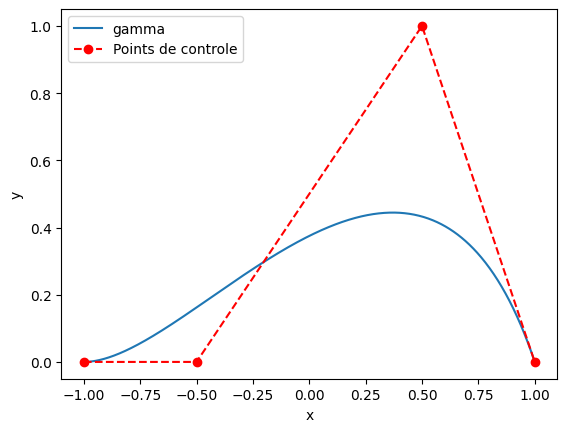

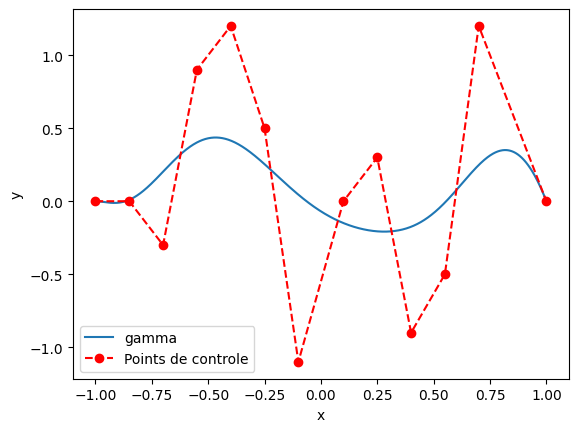

In [8]:
A = [[-1, 0], [-0.5, 0], [0.5, 1], [1, 0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
A = [
    [-1, 0],
    [-0.85, 0],
    [-0.7, -0.3],
    [-0.55, 0.9],
    [-0.4, 1.2],
    [-0.25, 0.5],
    [-0.1, -1.1],
    [0.1, 0],
    [0.25, 0.3],
    [0.4, -0.9],
    [0.55, -0.5],
    [0.7, 1.2],
    [1, 0]
]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 4. La longueur de nos courbes de Bézier est donnée par $L(\gamma) = \int_0^1 \sqrt{x'(t)^2 + y'(t)^2} dt$. Déterminer (au moins approximativement) et représenter des courbes de Bézier (avec les mêmes extrémités que précédemment) de longueurs 3 et 4.


In [9]:

def pente (x1, x2, y1, y2):  # pente entre deux points
    return (y2 - y1) / (x2 - x1)

def derivee (liste):  # dérivée d'une liste
    derivee = []
    for i in range (len(liste) - 1):
        derivee.append(pente(i, i + 1, liste[i], liste[i + 1]))
    return derivee

def longueur_courbe(GAMMA) :  # Calcule de la longueur de la courbe
    longeur = 0
    for i in range(len(GAMMA) - 1):
        longeur += np.sqrt((GAMMA[i + 1][0] - GAMMA[i][0]) ** 2 + (GAMMA[i + 1][1] - GAMMA[i][1]) ** 2)
    return longeur

def longueur_courbe_v2(A) :  # Calcule de la longueur de la courbe
    longueur = 0
    Xliste = X(A)
    Xprime = derivee(Xliste)
    Zliste = Z(A)
    Zprime = derivee(Zliste)
    for i in range(len(Xprime)) :
        longueur += np.sqrt((Xprime[i] ** 2 + Zprime[i] ** 2))
    return longueur


2.9578851188043656
2.9578851188043656
3.9999984292035697
3.9999984292035697


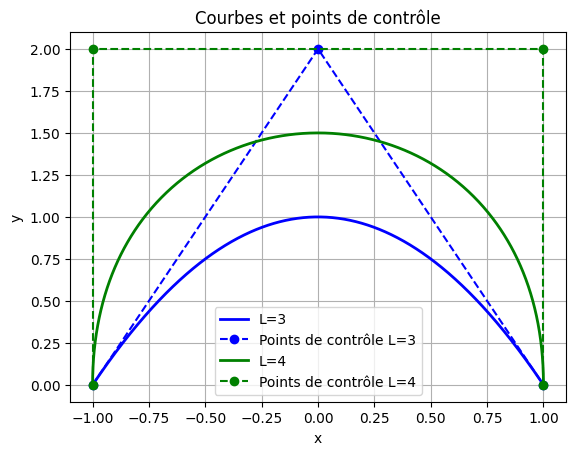

In [10]:
A = [[-1, 0], [0, 2], [1, 0]]
GAMMA1 = gamma(A)
GAMMA1 = np.array(GAMMA1)

print(longueur_courbe(GAMMA1))
print(longueur_courbe_v2(A))

plt.plot(GAMMA1[:, 0], GAMMA1[:, 1], label='L=3', color='blue', linestyle='-', linewidth=2)
A2 = np.array(A)
plt.plot(A2[:, 0], A2[:, 1], linestyle='--', label='Points de contrôle L=3', color='blue', marker='o')

A = [[-1, 0], [-1, 2], [1, 2], [1, 0]]
GAMMA1 = gamma(A)
GAMMA1 = np.array(GAMMA1)

print(longueur_courbe(GAMMA1))
print(longueur_courbe_v2(A))

plt.plot(GAMMA1[:, 0], GAMMA1[:, 1], label='L=4', color='green', linestyle='-', linewidth=2)
A2 = np.array(A)
plt.plot(A2[:, 0], A2[:, 1], linestyle='--', label='Points de contrôle L=4', color='green', marker='o')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Courbes et points de contrôle')
plt.grid(True)
plt.show()


## 2 Courbe de courbure minimale

##### 1. Écrire un programme qui, pour des fonctions $x$ et $y$ et un paramètre $t$, calcule la courbure de la courbe correspondante en $t$.

In [11]:
def k(Xprime, Zprime, Xseconde, Zseconde, t=None, DT=None): 
    Kliste = []
    for i in range(len(Xprime) - 1):
        k1 = abs(Xseconde[i] * Zprime[i] - Xprime[i] * Zseconde[i]) / ((Xprime[i] ** 2 + Zprime[i] ** 2) ** (3 / 2))
        Kliste.append(k1)
    if t is None: 
        return Kliste
    else:
        return Kliste[int(DT / 1000 * t)]  


2. Écrire un programme qui calcule la courbure maximale d’une courbe paramétrée.

In [24]:
def C(A):

    Xliste = X(A) + [-1.5] + [1.5]
    print (Xliste)  
    Zliste = Z(A) + [-0.5] + [-0.5]
    Xprime = derivee(Xliste)
    Zprime = derivee(Zliste)
    Xseconde = derivee(Xprime)
    Zseconde = derivee(Zprime)
    Cliste = k(Xprime, Zprime, Xseconde, Zseconde)
    CourbMax = max(Cliste) 
    t = [i for i, c in enumerate(Cliste) if c == CourbMax]  
    return CourbMax, t  


3. Donner plusieurs exemples en repérant graphiquement les points de courbure maximale.

315295.12303924205
[999]


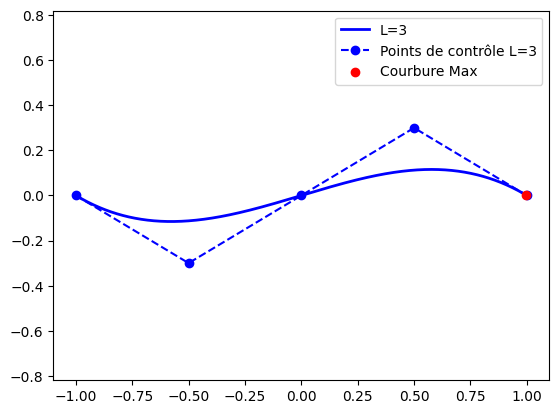

In [22]:

A = [[-1, 0],  [-0.5, -0.3], [0, 0], [0.5, 0.3], [1, 0]]
CourbMax , t = C(A)
print(CourbMax)
print(t)
Xliste = X(A)
GAMMA1 = gamma(A)
GAMMA1 = np.array(GAMMA1)
plt.plot(GAMMA1[:, 0], GAMMA1[:, 1], label='L=3', color='blue', linestyle='-', linewidth=2)
A2 = np.array(A)
plt.plot(A2[:, 0], A2[:, 1], linestyle='--', label='Points de contrôle L=3', color='blue', marker='o')
plt.axis('equal')
for i in range(len(t)):
    plt.scatter(X(A)[t[i]], Z(A)[t[i]], color='red', label='Courbure Max', zorder=5)
plt.legend()
plt.show()


4. Proposer une démarche, basée sur le nombre de points de contrôle et surtout leur position, permettant d’obtenir une courbe qui respecte les contraintes en $A_0$ et $A_n$ et qui minimise la courbure maximale.

Nous faisons 3 hypothèses, le y ne peut pas être négatif pour ne pas avoir de virage impossible au point de dpéart de la courbe, la symétrie des points de contrôles,

Utiliser le point dans lequeel la courbure est maximale et agir dessus en modifian les point contrôle. Premier problème c'est pas avoir de truc plat.

[-1.0, -0.998498501, -0.996994008, -0.995486527, -0.993976064, -0.9924626249999999, -0.990946216, -0.9894268430000001, -0.9879045120000001, -0.9863792289999999, -0.984851, -0.9833198310000001, -0.981785728, -0.980248697, -0.9787087440000001, -0.9771658749999999, -0.9756200960000001, -0.974071413, -0.9725198319999999, -0.9709653589999999, -0.9694079999999998, -0.9678477609999999, -0.966284648, -0.9647186670000001, -0.9631498239999999, -0.961578125, -0.960003576, -0.9584261829999999, -0.956845952, -0.9552628889999999, -0.953677, -0.9520882909999999, -0.9504967679999999, -0.9489024369999999, -0.9473053039999999, -0.9457053749999998, -0.9441026559999999, -0.9424971529999999, -0.9408888719999999, -0.9392778189999998, -0.9376639999999999, -0.9360474209999999, -0.9344280879999999, -0.9328060069999999, -0.9311811839999999, -0.9295536249999999, -0.9279233359999999, -0.9262903229999999, -0.924654592, -0.9230161489999998, -0.9213749999999998, -0.9197311509999998, -0.9180846079999997, -0.916435376

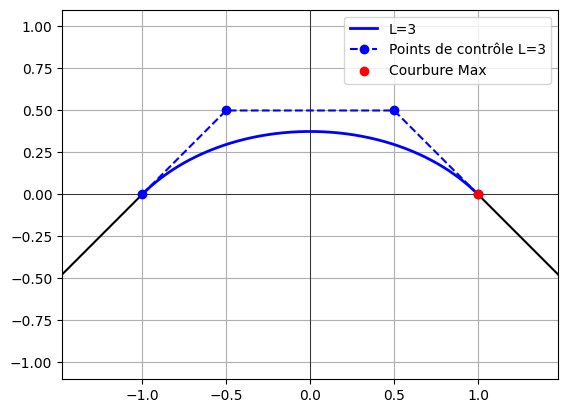

In [25]:

def Recherche(pente1, pente2,A,nb,x_min=-2,x_max=2):

    CourbMax , t = C(A)
    
    



    #Affichage des "routes"
    x1 = np.linspace(x_min, -1, 500) 
    x2 = np.linspace(1, x_max, 500)
    y1 = pente1 * (x1 + 1)
    y2 = pente2 * (x2 - 1) 
    plt.plot(x1, y1,color='black')
    plt.plot(x2, y2, color='black')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
  
    #Affichage de la courbe
    Xliste = X(A)
    GAMMA1 = gamma(A)
    GAMMA1 = np.array(GAMMA1)
    plt.plot(GAMMA1[:, 0], GAMMA1[:, 1], label='L=3', color='blue', linestyle='-', linewidth=2)
    A2 = np.array(A)
    plt.plot(A2[:, 0], A2[:, 1], linestyle='--', label='Points de contrôle L=3', color='blue', marker='o')
    plt.axis('equal')
    for i in range(len(t)):
        plt.scatter(X(A)[t[i]], Z(A)[t[i]], color='red', label='Courbure Max', zorder=5)
    plt.legend()
    # Afficher le graphique
    plt.xlim(-1.10, 1.10)
    plt.ylim(-1.10, 1.10)
    plt.grid(True)
    plt.show()

# Exemple d'utilisation
Recherche(pente1=1, pente2=-1,A = [[-1,0],[-0.5,0.5],[0.5,0.5],[1, 0]], nb=2)


5. Recommencer avec des pentes différentes en les deux points.

In [ ]:
#même code mais on change les pentes d'entrée

6. Pourrait-on, si on considérait autre chose que les courbes de Bézier, trouver une solution de courbure maximale aussi petite que voulue ?

7. (Bonus) Ajouter la contrainte de recollements de classe $C^2$ en $A_0$ et $A_n$ et déterminer ainsi de meilleures solutions au problème.

## 3 Courbe élastique

#### 1. Écrire un programme qui calcule la valeur numérique de $K$ d’une courbe donnée.

In [57]:
def K (A):
    Xliste = X(A)
    Zliste = Z(A)
    Xprime = derivee(Xliste)
    Zprime = derivee(Zliste)
    Xseconde = derivee(Xprime)
    Zseconde = derivee(Zprime)
    Kliste = k(Xprime, Zprime, Xseconde, Zseconde)
    somme = 0
    for i in range (len(Kliste)):
        somme += (Kliste[i]**2)*np.sqrt(Xprime[i]**2 + Zprime[i]**2)
    return somme

def derivee (liste):  # dérivée d'une liste
    derivee = []
    for i in range (len(liste) - 1):
        derivee.append(pente(i, i + 1, liste[i], liste[i + 1]))
    return derivee




#### 2. Proposer plusieurs exemples de telles courbes et calculer la valeur de $K$ correspondante.

2.6235095069022525


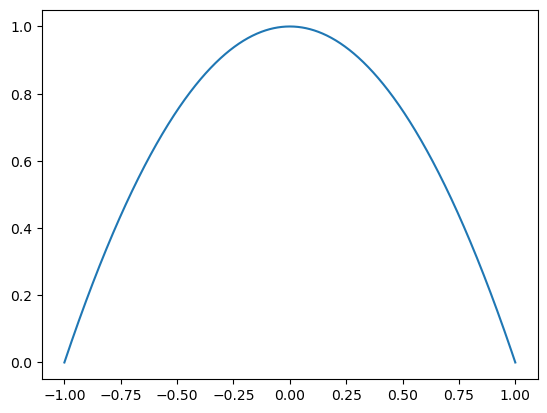

In [16]:
A = [[-1,0],[0,2],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
print(K(A))

2.9034627003854436


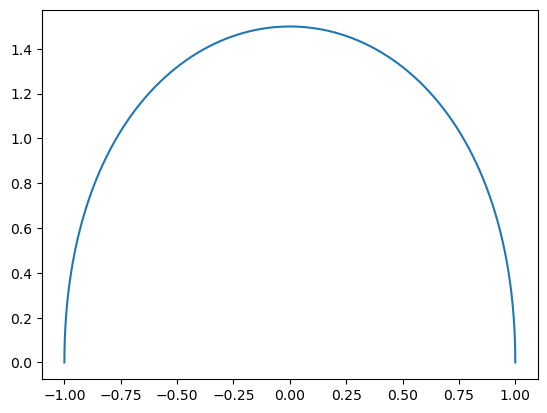

In [17]:
A = [[-1,0],[-1,2],[1,2],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
print(K(A))

17.41993875010344


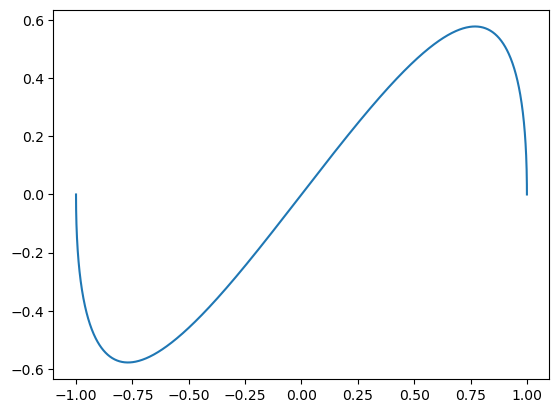

In [18]:
A = [[-1,0],[-1,-2],[1,2],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
print(K(A))

#### 3. Proposer une procédure, basée sur le nombre de points de contrôle et surtout leur position, qui, à partir d’une courbe donnée avec une certaine valeur de $K$, construit une nouvelle courbe (toujours de longueur approximative égale à 3) dont la valeur de $K$ devrait être inférieure.

Pour minimiser K nous allons posser des conditions pour simplifier la résolution du problème. Ces condition sont basée sur des observations des courbes précedament tracé. Ainsi que de la signification physique de l'énergie élastique.
1. Il semble logique que la courbe ne soit que concave où convexe.
2. Deplus on prendera une courbe symétrique par rapport à la droite d'equation y = 0.

Dans le but de simplifier la résolution du problème et la vitesse de résolution nous allons dabord nous limiter à 4 points de controle, dont deux sont fixés à (-1, 0) et (1, 0).

Nous alons faire varier l'écartement entre les deux autres points. Puis nous allons ensuite chercher la hauteur necessaire pour que la longeur de la courbe soit égale à la longeur désiré.

Pour optimiser le code, nous avons ajustons la hauteur des points proportionelements à l'écart à la longeur de courbe désiré.

Deplus nous nous apercevons que plus on écarte le points, plus l'énergie élastique diminue avant de réaugementer sans jamais décroitre. Ainsi le code à été modifié pour pouvoir s'éxécuter dans un temps raisonable.

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour ajuster y afin d'atteindre la longueur cible
def ajuster_y(x_1, y_1, y_prec, longueur_cible):
    A = [[-1, 0], [-x_1, y_1], [x_1, y_1], [1, 0]]
    while (longueur_courbe_v2(A) <= longueur_cible - 0.001) or (longueur_courbe_v2(A) >= longueur_cible + 0.001):
        y_1 = y_prec + (longueur_cible - longueur_courbe_v2(A)) * 0.8
        y_prec = y_1
        A = [[-1, 0], [-x_1, y_1], [x_1, y_1], [1, 0]]
    return A, y_1, y_prec

# Fonction principale pour calculer K en fonction de x
def K_opt(longueur_cible):
    x_1 = 0
    y_1 = 0
    y_prec = 1.3
    A_opt = [[-1, 0], [-x_1, y_1], [x_1, y_1], [1, 0]]
    K_opt = 1000.0

    x_values = []  # Liste pour stocker les valeurs de x
    K_values = []  # Liste pour stocker les valeurs de K

    for i in range(0, 300, 1):
        # Décrément de x pour changer la courbure
        x_1 = i / 40
        A, y_1, y_prec = ajuster_y(x_1, y_1, y_prec, longueur_cible)

        # Calcul de la courbure actuelle
        K_current = K(A)
        x_values.append(x_1)
        K_values.append(K_current)

        # Mise à jour de la courbure optimale si K est plus petit
        if K_current < K_opt:
            K_opt = K_current
            A_opt = A
        elif K_current > K_opt + 1: #Continuer un peu plus loin pour l'affichage des courbes
            break

    return x_values, K_values, A_opt

# Fonction pour tracer les résultats
def tracer_resultats(x_values, K_values, A_opt):
    
    GAMMA1 = gamma(A_opt)
    GAMMA1 = np.array(GAMMA1)

    plt.figure(figsize=(10, 5))

    # alure de la coubre
    plt.subplot(1, 2, 1)
    plt.plot(GAMMA1[:, 0], GAMMA1[:, 1], label='gamma')
    plt.title('Courbe gamma optimale')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # points de controle
    points_controle = np.array(A_opt)
    plt.scatter(points_controle[:, 0], points_controle[:, 1], color='red', label='Points de contrôle')

    plt.legend()

    # K(x)
    plt.subplot(1, 2, 2)
    plt.plot(x_values, K_values, label='K(x)')
    plt.title('Courbure K en fonction de x')
    plt.xlabel('x')
    plt.ylabel('K')
    
    K_min = np.array(K(A_opt))
    plt.scatter(points_controle[2, 0], K_min, color='red', label='min(K(x))')
    
    plt.legend()

    plt.tight_layout()
    plt.show()


### 4. Utiliser cette procédure pour approcher autant que possible la courbe solution du problème.

Pour une longueur de 3 :

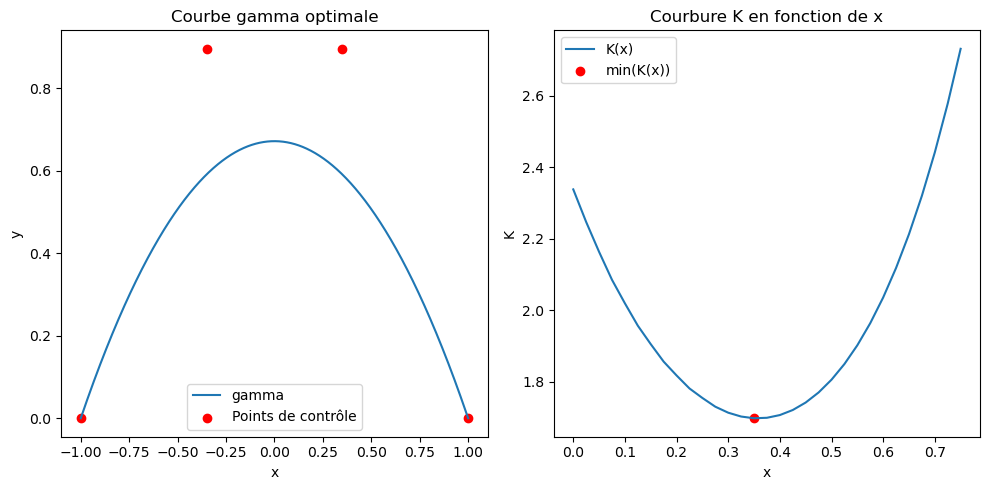

A_opt correspondant au plus petit K : [[-1, 0], [-0.35, 0.8959934180774496], [0.35, 0.8959934180774496], [1, 0]]
Valeur de K minimale : 1.697661784447507


In [62]:
longueur_cible = 2.5  # Longueur de courbe souhaitée
x_values, K_values, A_opt = K_opt(longueur_cible)
tracer_resultats(x_values, K_values, A_opt)

# Affichage des paramètres optimaux
print("A_opt correspondant au plus petit K :", A_opt)
print("Valeur de K minimale :", K(A_opt))

### 5. Recommencer avec d’autres longueurs $L$.

Pour une longeur de 4 :

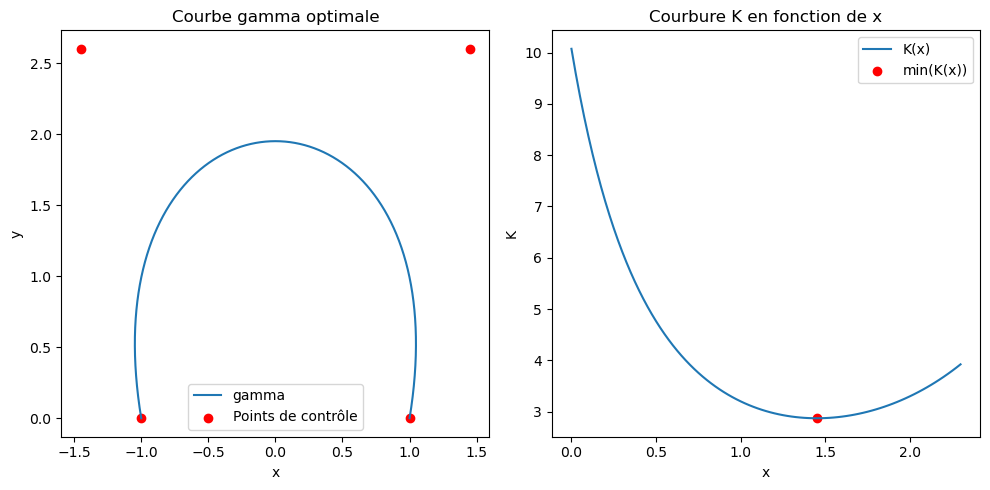

A_opt correspondant au plus petit K : [[-1, 0], [-1.45, 2.602157896004035], [1.45, 2.602157896004035], [1, 0]]
Valeur de K minimale : 2.873228802446989


In [58]:
longueur_cible = 5.0  # Longueur de courbe souhaitée
x_values, K_values, A_opt = K_opt(longueur_cible)
tracer_resultats(x_values, K_values, A_opt)

# Affichage des paramètres optimaux
print("A_opt correspondant au plus petit K :", A_opt)
print("Valeur de K minimale :", K(A_opt))

Pour une longueur de 15 :

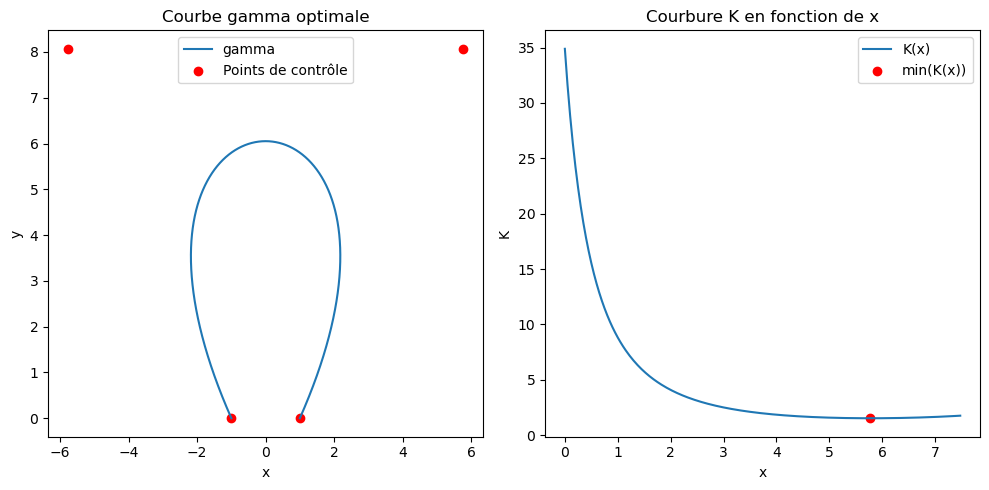

A_opt correspondant au plus petit K : [[-1, 0], [-5.775, 8.068233239799321], [5.775, 8.068233239799321], [1, 0]]
Valeur de K minimale : 1.5326890507536668


In [59]:
longueur_cible = 15.0  # Longueur de courbe souhaitée
x_values, K_values, A_opt = K_opt(longueur_cible)
tracer_resultats(x_values, K_values, A_opt)

# Affichage des paramètres optimaux
print("A_opt correspondant au plus petit K :", A_opt)
print("Valeur de K minimale :", K(A_opt))